# Exercise 6.5 Machine Learning Part 2

## This script contains the following:
## 1. Importing libraries and data and removing unwanted columns
## 2. The elbow technique
## 3. k-means clustering

# 1. Importing libraries and data and removing unwanted columns

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [9]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# import the cvs file
path = r'/Users/fatemehshahvirdi/Work-Related/Data Analysis/Data Immersion/Achievement 6/Rome & Sydney Analysis/O2 Data'
df_rome_june = pd.read_csv(os.path.join(path, 'Prepared', 'rome_listings_june_cleaned-2.csv'), index_col=False)

In [11]:
df_rome_june.head()

,Unnamed: 0,id,host_id,place_name,rating,num_bedroom,num_bed,baths,neighborhood,latitude,longitude,room_type,price,min_nights,num_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m
0,0,2737,3047,Place to stay in Rome,4.80,1.0,1.0,1.5 baths,VIII Appia Antica,41.871360,12.482150,Private room,50,7,7,2015-05-28 00:00:00,0.07,6,358,0
1,1,181189,868477,Bed and breakfast in Rome,4.72,1.0,1.0,1 private bath,I Centro Storico,41.909630,12.456030,Hotel room,100,3,147,2023-06-05 00:00:00,1.03,8,175,6
2,2,11834,44552,Rental unit in Rome,4.80,1.0,1.0,1 bath,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,191,2023-06-02 00:00:00,1.30,1,246,44
3,3,49240,224479,Condo in Rome,4.69,2.0,5.0,1.5 baths,I Centro Storico,41.897380,12.476000,Entire home/apt,294,2,70,2023-04-11 00:00:00,0.46,2,151,32
4,4,181747,871063,Rental unit in Rome,4.56,2.0,3.0,2 baths,I Centro Storico,41.901830,12.503970,Entire home/apt,228,2,85,2023-06-09 00:00:00,0.63,2,329,42


In [12]:
# Remove the unwanted column
df_rome_june = df_rome_june.loc[:, ~df_rome_june.columns.str.contains('Unnamed: 0')]

In [13]:
df_rome_june.shape

(20266, 19)

In [14]:
nan_values = df_rome_june['rating'].isnull()
if nan_values.any():
    print("There are NaN values in the 'rating' column.")
else:
    print("There are no NaN values in the 'rating' column.")

There are NaN values in the 'rating' column.


In [15]:
data_types = df_rome_june.dtypes
print(data_types)

id                                  int64
host_id                             int64
place_name                         object
rating                            float64
num_bedroom                       float64
num_bed                           float64
baths                              object
neighborhood                       object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
min_nights                          int64
num_reviews                         int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
num_reviews_last_12m                int64
dtype: object


In [16]:
nan_values = df_rome_june.isna().any()
print(nan_values)

id                                False
host_id                           False
place_name                        False
rating                             True
num_bedroom                       False
num_bed                           False
baths                             False
neighborhood                      False
latitude                          False
longitude                         False
room_type                         False
price                             False
min_nights                        False
num_reviews                       False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
num_reviews_last_12m              False
dtype: bool


In [17]:
# Count NaN values in the "rating" column
nan_count = df_rome_june['rating'].isna().sum()
print("Number of NaN values in 'rating' column:", nan_count)

# Remove rows with NaN values in the "rating" column
df_cleaned = df_rome_june.dropna(subset=['rating'])

Number of NaN values in 'rating' column: 1243


In [18]:
# Count NaN values in the "rating" column
nan_count = df_cleaned['rating'].isna().sum()
print("Number of NaN values in 'rating' column:", nan_count)

Number of NaN values in 'rating' column: 0


In [19]:
# Count NaN values in the "reviews_per_month" column
nan_count = df_cleaned['reviews_per_month'].isna().sum()
print("Number of NaN values in 'reviews_per_month' column:", nan_count)

Number of NaN values in 'reviews_per_month' column: 0


In [20]:
nan_values = df_cleaned.isna().any()
print(nan_values)

id                                False
host_id                           False
place_name                        False
rating                            False
num_bedroom                       False
num_bed                           False
baths                             False
neighborhood                      False
latitude                          False
longitude                         False
room_type                         False
price                             False
min_nights                        False
num_reviews                       False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
num_reviews_last_12m              False
dtype: bool


In [21]:
df_cleaned.columns

Index(['id', 'host_id', 'place_name', 'rating', 'num_bedroom', 'num_bed',
       'baths', 'neighborhood', 'latitude', 'longitude', 'room_type', 'price',
       'min_nights', 'num_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'num_reviews_last_12m'],
      dtype='object')

In [22]:
columns_to_remove = ['id', 'host_id','place_name', 'baths', 'latitude', 'longitude','neighborhood','room_type', 'last_review']
df_cleaned_for_fit = df_cleaned.drop(columns=columns_to_remove)

In [23]:
df_cleaned_for_fit.columns

Index(['rating', 'num_bedroom', 'num_bed', 'price', 'min_nights',
       'num_reviews', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'num_reviews_last_12m'],
      dtype='object')

# 2. The elbow technique

In [24]:
# define  number of potential clusters in data
num_cl = range(1, 10)

# define kmeans clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [25]:
# create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_cleaned_for_fit).score(df_cleaned_for_fit) for i in range(len(kmeans))]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

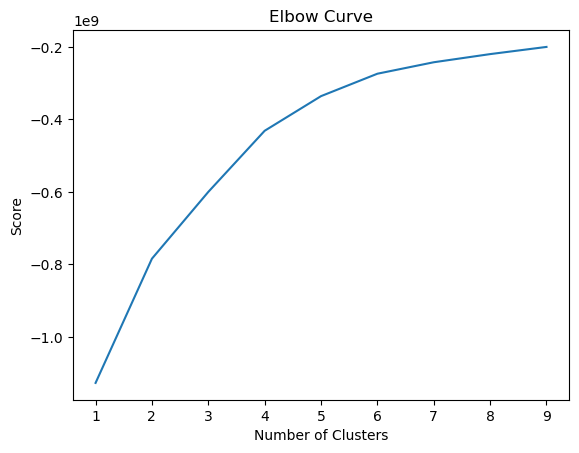

In [26]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from 1 to 2 on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is 2.

# 3. k-means clustering

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [28]:
# Fit the k-means object to the data.

kmeans.fit(df_cleaned_for_fit)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [29]:
df_cleaned_for_fit['clusters'] = kmeans.fit_predict(df_cleaned_for_fit)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
df_cleaned_for_fit.head()

,rating,num_bedroom,num_bed,price,min_nights,num_reviews,reviews_per_month,calculated_host_listings_count,availability_365,num_reviews_last_12m,clusters
0,4.80,1.0,1.0,50,7,7,0.07,6,358,0,0
1,4.72,1.0,1.0,100,3,147,1.03,8,175,6,1
2,4.80,1.0,1.0,105,2,191,1.30,1,246,44,0
3,4.69,2.0,5.0,294,2,70,0.46,2,151,32,1
4,4.56,2.0,3.0,228,2,85,0.63,2,329,42,0


In [31]:
df_cleaned_for_fit['clusters'].value_counts()

clusters
0    9380
1    8003
3    1564
2      76
Name: count, dtype: int64

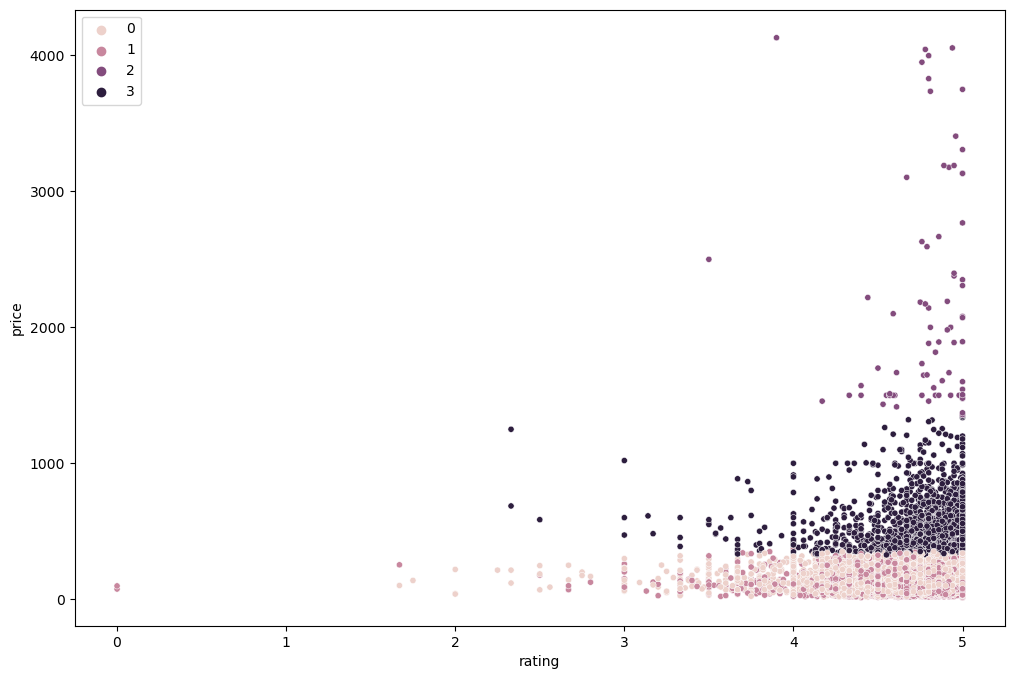

In [32]:


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_for_fit['rating'], y=df_cleaned_for_fit['price'], hue=kmeans.labels_, s=20) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('rating') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

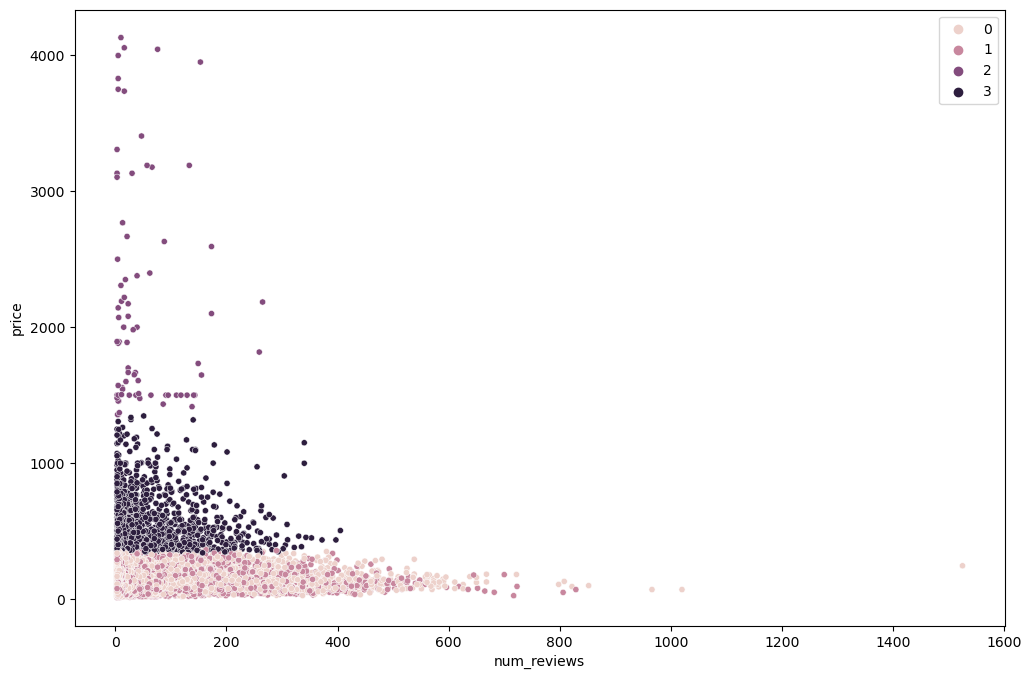

In [33]:


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_for_fit['num_reviews'], y=df_cleaned_for_fit['price'], hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.xlabel('num_reviews') 
plt.ylabel('price') 
plt.show()

In [34]:
df_cleaned_for_fit.loc[df_cleaned_for_fit['clusters'] == 2, 'cluster'] = 'dark purple'
df_cleaned_for_fit.loc[df_cleaned_for_fit['clusters'] == 1, 'cluster'] = 'purple'
df_cleaned_for_fit.loc[df_cleaned_for_fit['clusters'] == 0, 'cluster'] = 'pink'

In [35]:
df_cleaned_for_fit.groupby('cluster').agg({'rating':['mean', 'median'], 
                         'num_reviews':['mean', 'median'], 
                         'reviews_per_month':['mean', 'median'],
                          'price':['mean', 'median']})

rating        num_reviews        reviews_per_month         \
                 mean median        mean median              mean median   
cluster                                                                    
dark purple  4.782632   4.84   49.789474   23.0          0.961579  0.665   
nan          4.740422   4.82   57.019182   30.0          1.544629  1.150   
pink         4.702913   4.77   73.614925   33.0          2.009580  1.520   
purple       4.744657   4.81   69.579533   34.0          1.696043  1.150   

                   price          
                    mean  median  
cluster                           
dark purple  2177.539474  1890.0  
nan           525.413683   462.0  
pink          147.781876   134.0  
purple        122.881794   107.0

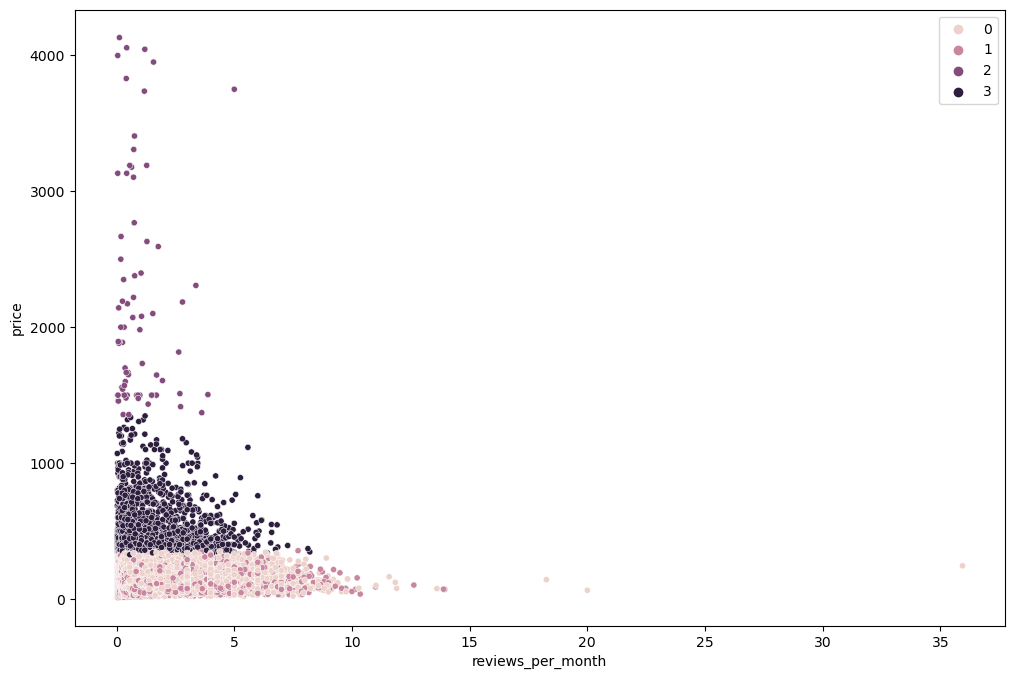

In [36]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_for_fit['reviews_per_month'], y=df_cleaned_for_fit['price'], hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.xlabel('reviews_per_month') 
plt.ylabel('price') 
plt.show()

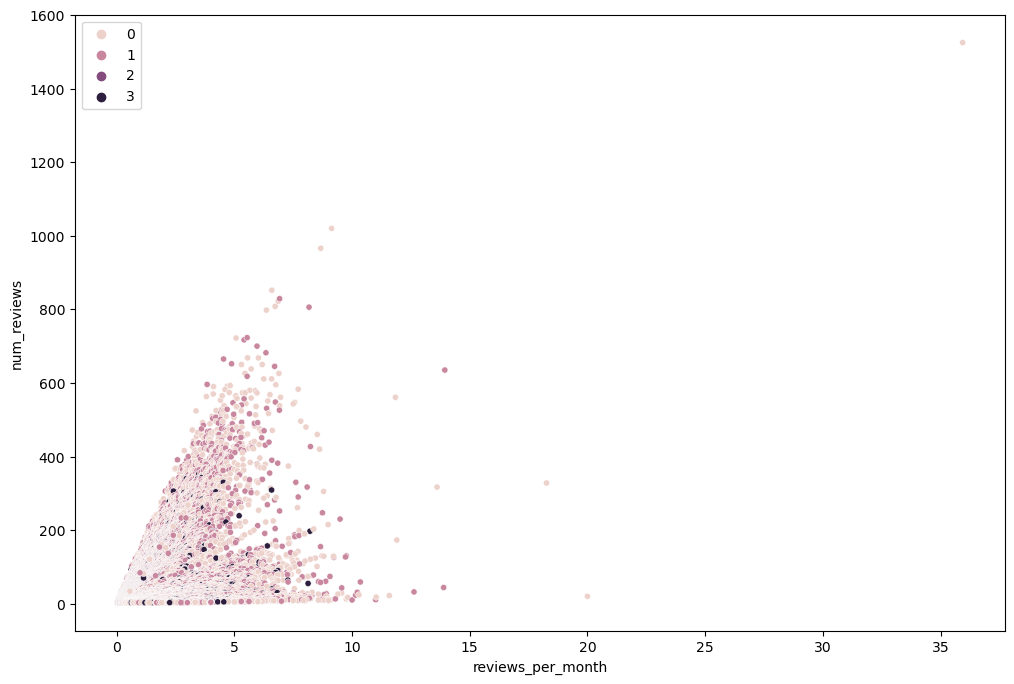

In [37]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_for_fit['reviews_per_month'], y=df_cleaned_for_fit['num_reviews'], hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.xlabel('reviews_per_month') 
plt.ylabel('num_reviews') 
plt.show()

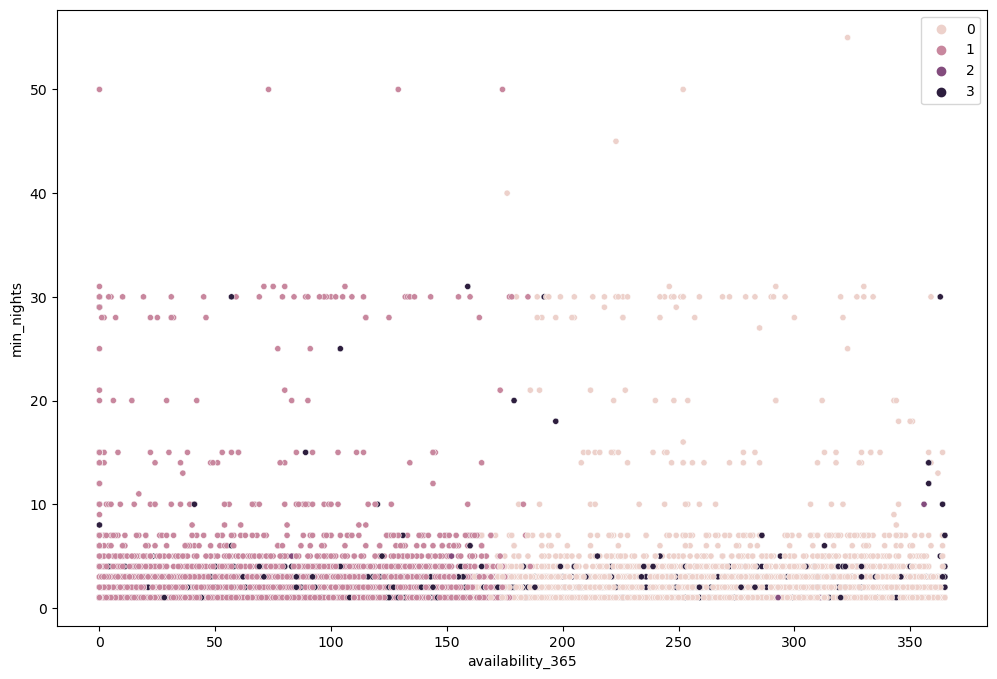

In [38]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_for_fit['availability_365'], y=df_cleaned_for_fit['min_nights'], hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.xlabel('availability_365') 
plt.ylabel('min_nights') 
plt.show()

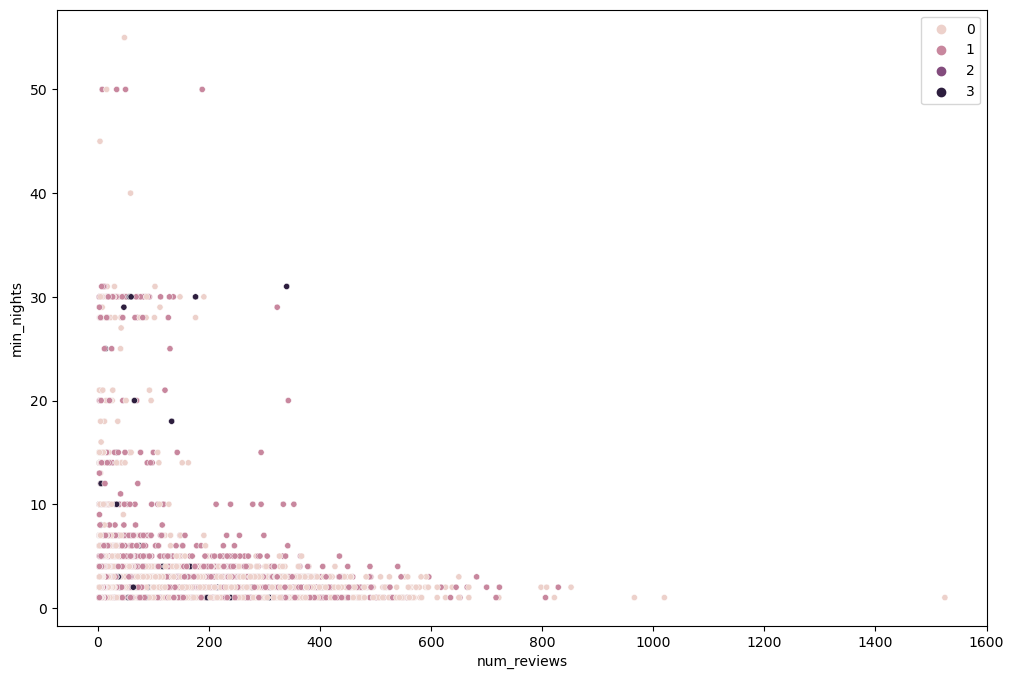

In [39]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_for_fit['num_reviews'], y=df_cleaned_for_fit['min_nights'], hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.xlabel('num_reviews') 
plt.ylabel('min_nights') 
plt.show()

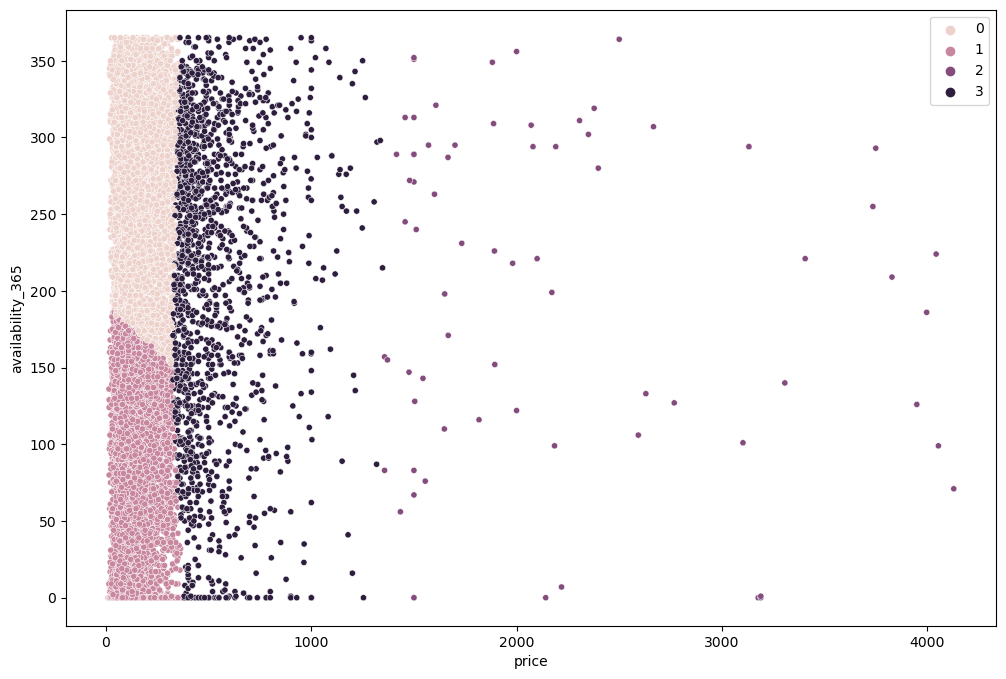

In [40]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_for_fit['price'], y=df_cleaned_for_fit['availability_365'], hue=kmeans.labels_, s=20)

ax.grid(False) 
plt.xlabel('price') 
plt.ylabel('availability_365') 
plt.show()

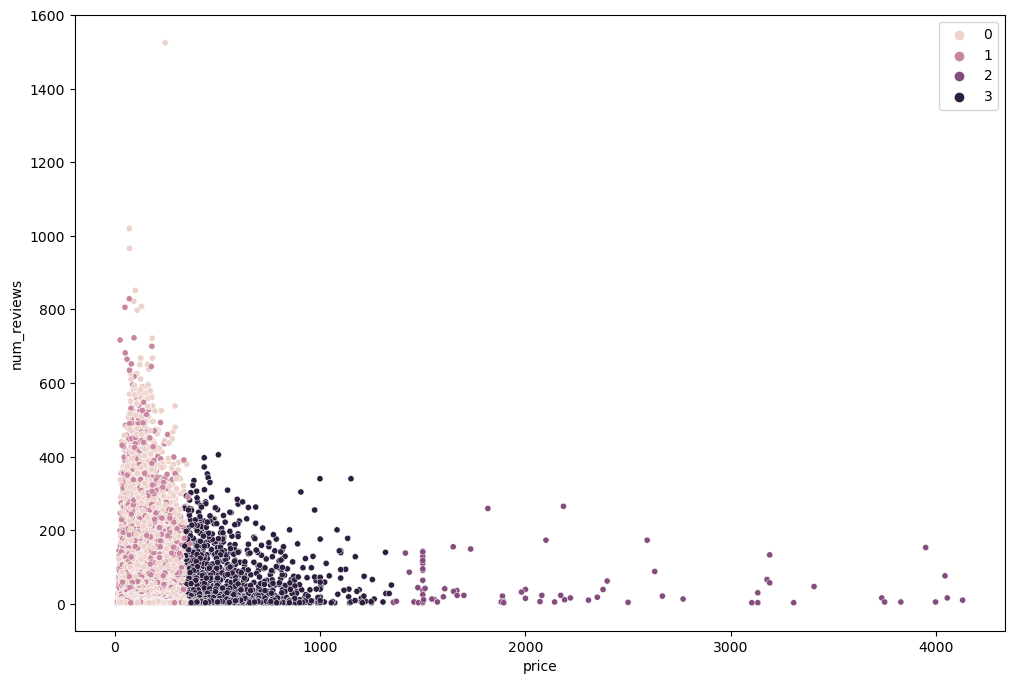

In [41]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_for_fit['price'], y=df_cleaned_for_fit['num_reviews'], hue=kmeans.labels_, s=20)


plt.xlabel('price') 
plt.ylabel('num_reviews')
ax.grid(False) 
plt.show()

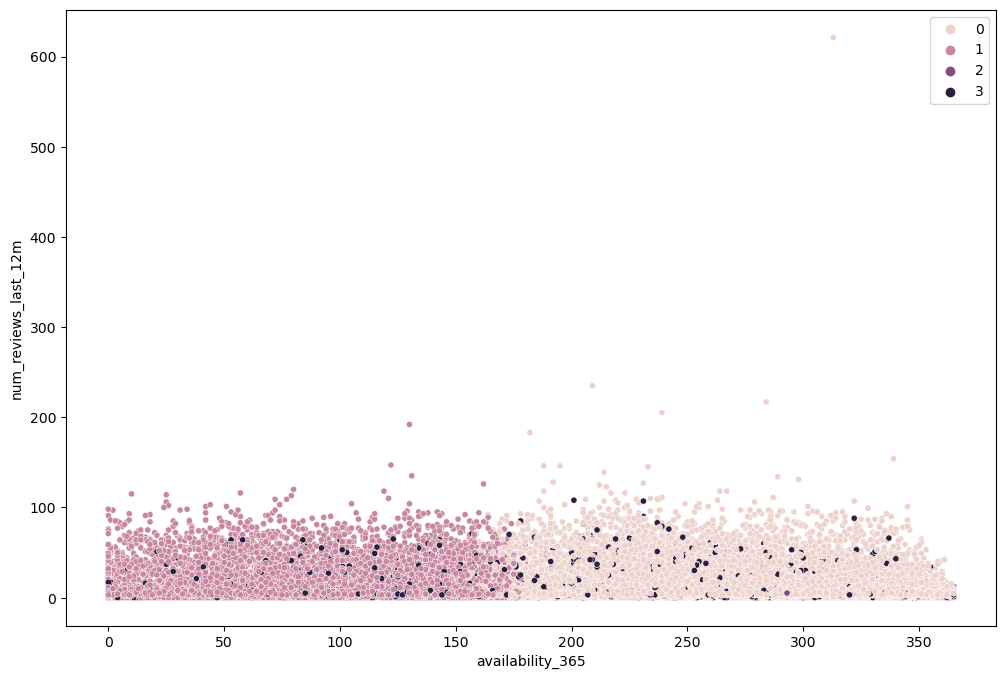

In [42]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cleaned_for_fit['availability_365'], y=df_cleaned_for_fit['num_reviews_last_12m'], hue=kmeans.labels_, s=20)


plt.xlabel('availability_365') 
plt.ylabel('num_reviews_last_12m')
ax.grid(False) 
plt.show()

In [43]:
#export
df_cleaned.to_csv(os.path.join(path,'Prepared', 'rome_listings_june_cleaned-3.csv'))